In [1]:
import torch
import torch.nn
import torchvision.transforms as transforms

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from models.deepcrack_networks import define_deepcrack

In [2]:
#--- build the model ---#
crack_model = define_deepcrack(
    in_nc = 3,
    num_classes = 1,
    ngf = 64
).eval()

#--- download the pretrained model and copy to the "./pretrained_models" folder ---#
state_dict = torch.load("./checkpoints/gaps384_40x40_deepcrack/latest_net_G.pth")
crack_model.load_state_dict(state_dict)

initialize network with xavier


/var/folders/b9/bb77tb_d0bz1lyklq7bknkw80000gn/T/ipykernel_51072/4290538687.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("./checkpoints/gaps38

<All keys matched successfully>

torch.Size([1, 3, 640, 640])


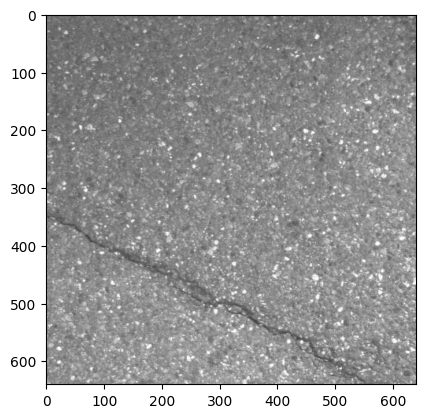

In [3]:
#--- load a test image ---#
test_img = Image.open("../GAPs384/train/images/test_0005_541_1_jpg.rf.f3935f23ba88d863b4b4a5d7bac894d5.jpg").convert("RGB")
plt.imshow(np.array(test_img))

#--- transform to torch.Tensor type ---#
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))])
test_img = transform(test_img).unsqueeze(0)
print(test_img.shape)

In [4]:
#--- inference and convert the prediction value between 0 and 1 by sigmoid function -
with torch.no_grad():
    pred = crack_model(test_img)[-1]

pred = torch.sigmoid(pred)
print(pred.shape)

#print(torch.max(pred), torch.min(pred))

binary_mask = pred < 0.5

rounded_tensor = binary_mask.int()

print(rounded_tensor)

torch.Size([1, 1, 640, 640])
tensor([[[[1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          ...,
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1]]]], dtype=torch.int32)


In [5]:
print(type(pred))
pred = (pred.squeeze().numpy() * 255).astype("uint8")
rounded_pred = (rounded_tensor.squeeze().numpy() * 255).astype("uint8")

<class 'torch.Tensor'>


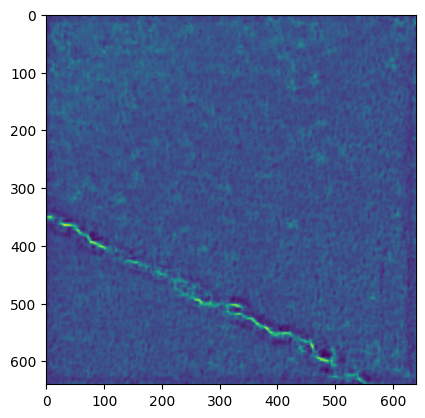

In [8]:
#plt.imshow(rounded_tensor)
plt.imshow(pred)